### **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**


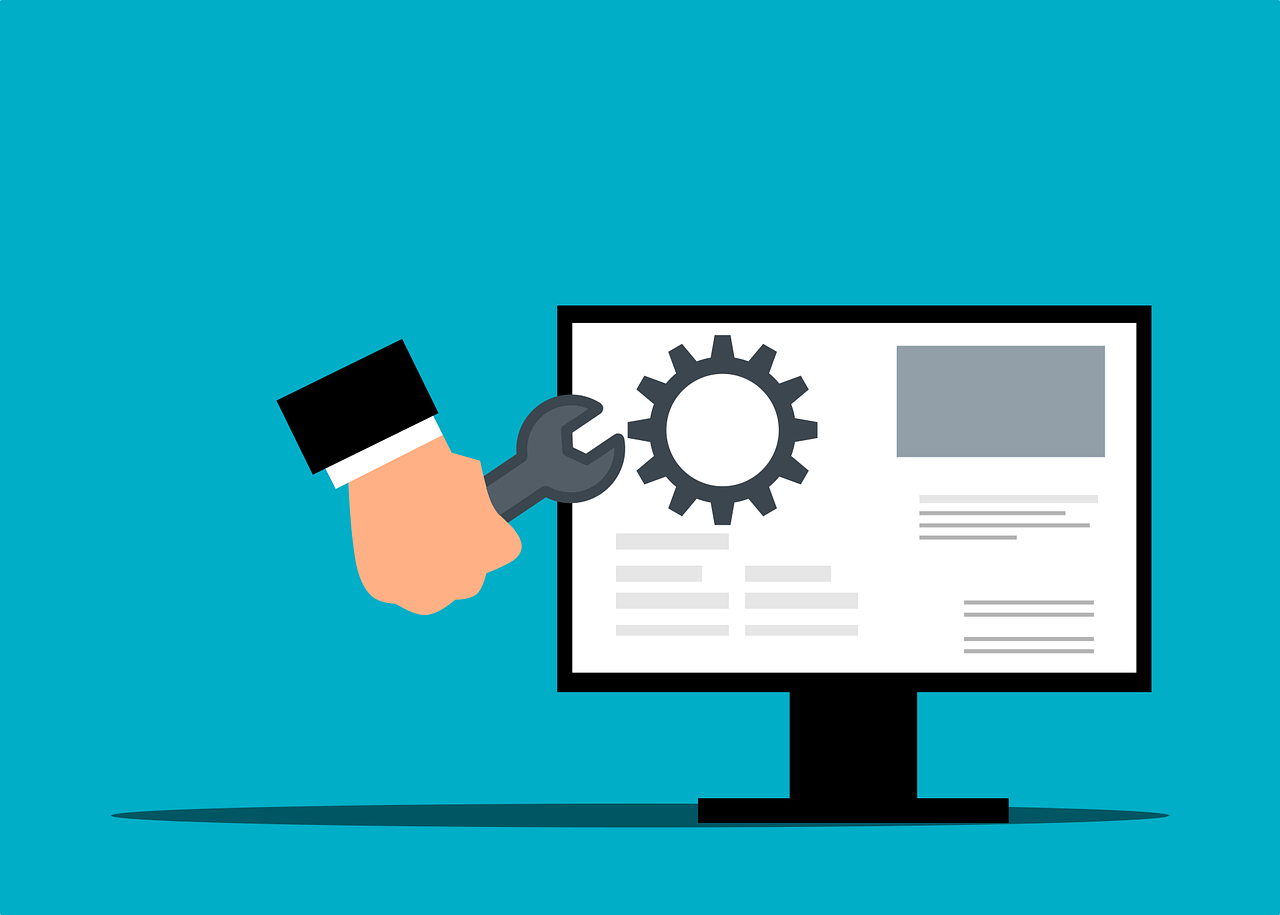

### **Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.


### **Sample of Expected Output**

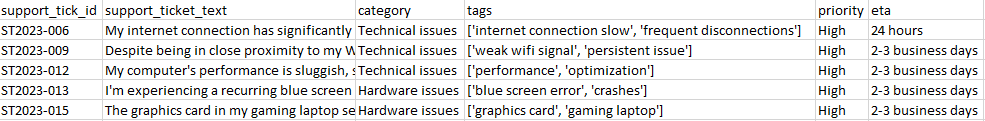

### **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.


### **Installing Necessary Libraries and Dependencies**

In [1]:
!pip install lida==0.0.10 fastapi kaleido python-multipart uvicorn llmx==0.0.15a0 cohere openai tiktoken tensorflow-probability==0.22.0 -q


In [2]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -q --use-deprecated=legacy-resolver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 28.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 139.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 165.0 MB/s eta 0:00:00
ERROR: pip's legacy dependency resolver does not consider dependency conflicts when selecting packages. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you'll have typing-extensions 4.9.0 which is incompatible.


In [3]:
# Install the hugging face hub
!pip install huggingface_hub -q

### **Q1: Write Python code that imports the 'hf_hub_download' function from the 'huggingface_hub' library and also imports the 'Llama' class from the 'llama_cpp' library.**

**Ensure that the code is correctly formatted and ready for execution.**

In [4]:
# complete the code to import the 'hf_hub_download' function from the 'huggingface_hub' library
from huggingface_hub import hf_hub_download

# complete the code to import the 'Llama' class from the 'llama_cpp' library
from llama_cpp import Llama

In [5]:
# defining the model name or path as a string (You can find this info from hugging face website)
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# defining the model basename as a string, indicating it's in the gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf"

In [6]:
# downloading the model from the Hugging Face Hub using the 'hf_hub_download' function by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id = model_name_or_path,    # complete the code to mentioned the repo_id
    filename = model_basename    # complete the code to mentioned the filename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [7]:
!nvidia-smi

Sun Jan  7 17:17:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
# complete the code to create an instance of the 'Llama' class with specified parameters

lcpp_llm = Llama(
        model_path=model_path,
            n_threads=2, # CPU cores
            n_batch=512,  # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
            n_gpu_layers=43,  # Change this value based on your model and your GPU VRAM pool.
            n_ctx=4096, # Context window
    )

AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


### **Q2: Define the System Message**

Write a Python function called **generate_llama_response** that takes a single parameter, support_ticket_text, which represents the user's support ticket text. Inside the function, you should perform the following tasks:

Define a system message as a string and assign it to the variable system_message.

- **Combine the support_ticket_text and system_message to create a prompt string.**

*Generate a response from the LLaMA model using the lcpp_llm instance with the following parameters:*

- prompt should be the combined prompt string.
- max_tokens should be set to 256.
- temperature should be set to 0.
- top_p should be set to 0.95.
- repeat_penalty should be set to 1.2.
- top_k should be set to 50.
- stop should be set as a list containing 'INST'.
- echo should be set to False.
Extract and return the response text from the generated response.

Don't forget to provide a value for the system_message variable before using it in the function.



*What content and instructions should be included in the system message to guide the technical assistant when processing support tickets? Please provide a detailed description of the information and guidelines that the system message should contain.*

Here's a detailed breakdown of what should be included:

- **Introduction (System Role):** Begin with an introductory statement that establishes the role of the system message. In this case, it's acting as a guide for a technical assistant.

- **Ticket Categorization:** Explain the primary task of the technical assistant, which is to classify the support ticket into specific categories. In this example, the categories are:
    - Technical Issues
    - Hardware Issues
    - Data Recovery

- **Response Options:** Clearly state that the assistant should only respond with one of the predefined categories, emphasizing that other responses are not acceptable.

- **Sub-Tasks:** Outline the secondary tasks that the technical assistant should perform once the category is identified. These sub-tasks include:
  - **Creating Tags:** Instruct the assistant to create tags that will help further classify the ticket.
  - **Assigning Priority:** Specify that the assistant should assign a priority level (e.g., "High" or "Normal") based on their understanding of the text.
  - **Suggesting ETA:** Guide the assistant to provide an estimated time for
resolving the issue mentioned in the ticket.

- **General Instructions:** Offer general instructions that should be followed throughout the ticket processing, such as:

  - **Categorization:** Reiterate that the assistant should categorize the ticket only into the predefined categories.
  - **Reading Carefully:** Stress the importance of reading the support ticket text thoroughly and considering the overall sentiment before assigning priority.
  - **Output Format:** Clearly specify the desired output format for the responses generated by the assistant. In this case, the output should be in JSON format.

**The output of the model should be in JSON format**

In [9]:
def generate_llama_response(support_ticket_text):

    # System message
    system_message = """
        [INST]<<SYS>>
        ONLY return the desired JSON output, DO NOT give any additional analysis, text or explanatoins for your response.
        You are an AI analyzing tech support tickets. Your goal is to classsify the ticket category of the provided text into the following categories:
        - Technical Issue
        - Hardware Issue
        - Data Recovery

        Once that is done, create a list of additional tags that will help furhter classify the ticket and extract them.

        Further, give the support ticket a priority level from the following categories:
        - Low
        - High

        Finally, give a suggested an estimated time of completion (ETA) for how long this taks will take to complete.

        Return the output in the specified JSON format, ensuring consistency and handling missing values appropriately Ensure that all values in the JSON are formatted as strings, and each element within the lists should be enclosed in double quotes:

        {
            "Category": "your_category_prediction",
            "Tags": "["additional tags"]",
            "Priority": "your_priority_prediction",
            "ETA": "your_ETA_prediction"
        }

        The prediction for Category should be one of "Technical Issue", "Hardware Issue", or "Data Recovery" only.
        In case one of the three aspects is not mentioned in the review, set "Not Applicable" (including quotes) in the corresponding JSON key value for the sentiment.
        The prediction for Priority should be one of "Low", or "High" only.
        In case one of the three aspects is not mentioned in the review, set "Not Applicable" (including quotes) in the corresponding JSON key value for the sentiment.
        In case there are no additional Tags for a particular support ticket, then assign an empty list in the corresponding JSON key value for the aspect.
        ONLY return the desired JSON output, DO NOT give any additional analysis, text or explanatoins for your response.
        <</SYS>>[/INST]
      """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{support_ticket_text}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=1024,  # complete the code to set the max tokens to generate
        temperature=0,   # complete the code to set the temperature (between 0 and 1)
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False
    )

    # Extract and return the response text
    response_text = response["choices"][0]["text"]
    return response_text

### **Q3: Loading the Dataset**

In [10]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Read the CSV file into a DataFrame and store it in the 'data' variable
csv_file_path = "/content/drive/MyDrive/UT AI Course/Module 7 - Natural Language Processing/Project/Support_ticket_text_data_mid_term.csv"
data = pd.read_csv(csv_file_path)

### **Data Overview**

In [13]:
# Check the first 5 rows of the data
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


In [14]:
# Check the shape of the data
data.shape

(21, 2)

In [15]:
# Check for missing values in the data
data.isnull().sum()

support_tick_id        0
support_ticket_text    0
dtype: int64

The data loaded correctly, it has 21 rows and 2 columns, and has no null values.

### **Q4: Create a new column in the DataFrame called 'llama_response' and populate it with responses generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame**

In [16]:
# complete the code to create a new column llama_response'
# by applying the function to each element in the 'support_ticket_text' column of the DataFrame 'data'
data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x)).replace('\n', '')

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [17]:
# Check the first five rows of the data to confirm whether the new column has been added
data.head(22)

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issue"",..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issue"",\..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issue"",..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Technical Issue"",..."
5,ST2023-011,I'm locked out of my online banking account an...,"{\n ""Category"": ""Technical Issue"",..."
6,ST2023-012,"My computer's performance is sluggish, severel...","{\n ""Category"": ""Technical Issue"",..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{\n ""Category"": ""Hardware Issue"",\..."
8,ST2023-014,My external hard drive isn't being recognized ...,"{\n ""Category"": ""Data Recovery"",\n..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{\n ""Category"": ""Hardware Issue"",\..."



### **Q5: Prepare the dataset in the desired format.**

In [18]:
import json

In [19]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [20]:
# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)
data.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Inte..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issue"",\...","{'Category': 'Hardware Issue', 'Tags': ['urgen..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n...","{'Category': 'Data Recovery', 'Tags': ['delete..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Batt..."


In [21]:
# creating a new dataframe from the parsed llama response
llama_response_parsed_df = pd.json_normalize(data['llama_response_parsed'])

In [22]:
llama_response_parsed_df.head()

,Category,Tags,Priority,ETA
0,Technical Issue,[Internet Connection],High,2-3 business days
1,Hardware Issue,"[urgent, presentation]",High,1-2 days
2,Data Recovery,"[deleted documents, substantial data loss]",High,2-3 business days
3,Technical Issue,[Wi-Fi signal strength],High,24 hours
4,Technical Issue,[Battery Drain],High,2-3 business days


In [23]:
# complete the code to concatenate the original data with the dataframe containing the parsed model output
data_with_parsed_model_output = pd.concat([data, llama_response_parsed_df], axis=1)
data_with_parsed_model_output.head()

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Inte...",Technical Issue,[Internet Connection],High,2-3 business days
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware Issue"",\...","{'Category': 'Hardware Issue', 'Tags': ['urgen...",Hardware Issue,"[urgent, presentation]",High,1-2 days
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Data Recovery"",\n...","{'Category': 'Data Recovery', 'Tags': ['delete...",Data Recovery,"[deleted documents, substantial data loss]",High,2-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Wi-F...",Technical Issue,[Wi-Fi signal strength],High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Technical Issue"",...","{'Category': 'Technical Issue', 'Tags': ['Batt...",Technical Issue,[Battery Drain],High,2-3 business days


In [24]:
# complete the code to drop the columns containing the raw model response
pd.set_option('display.max_colwidth', None)
final_data = data_with_parsed_model_output.drop(['llama_response', 'llama_response_parsed'], axis=1)
final_data.head(22)

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.",Technical Issue,[Internet Connection],High,2-3 business days
1,ST2023-007,"Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue",Hardware Issue,"[urgent, presentation]",High,1-2 days
2,ST2023-008,"I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?",Data Recovery,"[deleted documents, substantial data loss]",High,2-3 business days
3,ST2023-009,"Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.",Technical Issue,[Wi-Fi signal strength],High,24 hours
4,ST2023-010,"My smartphone battery is draining rapidly, even with minimal use. Can you help me identify and rectify this battery issue?",Technical Issue,[Battery Drain],High,2-3 business days
5,ST2023-011,I'm locked out of my online banking account and need immediate assistance in resetting my password for an urgent transaction.,Technical Issue,[urgent transaction],High,Immediate
6,ST2023-012,"My computer's performance is sluggish, severely impacting my work. I need help optimizing it to regain productivity.",Technical Issue,[Performance Optimization],High,2-3 business days
7,ST2023-013,"I'm experiencing a recurring blue screen error on my PC, causing frequent crashes. Help me diagnose and resolve this hardware issue.",Hardware Issue,"[Blue Screen Error, Frequent Crashes]",High,2-3 business days
8,ST2023-014,My external hard drive isn't being recognized by my computer. I need assistance recovering vital data stored on it.,Data Recovery,[vital data recovery],High,2-3 business days
9,ST2023-015,"The graphics card in my gaming laptop seems to be malfunctioning, causing poor gaming performance. Can you assist in diagnosing and fixing this hardware issue?",Hardware Issue,[Graphics Card Malfunctioning],High,2-3 business days


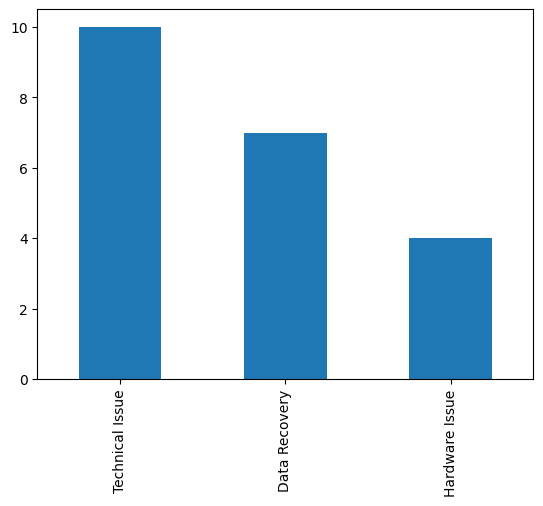

In [25]:
# Libaries to help with data visualization
import matplotlib.pyplot as plt

pd.value_counts(final_data['Category']).plot.bar()
plt.show()

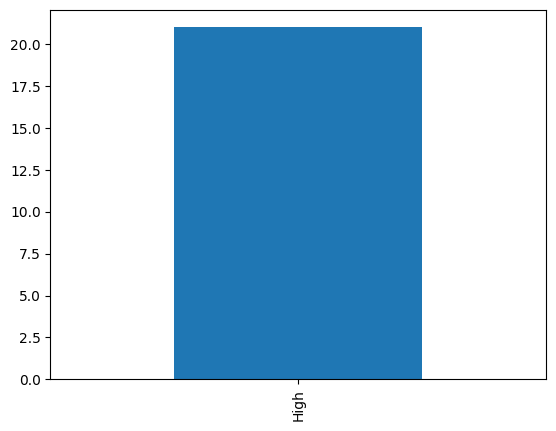

In [26]:
pd.value_counts(final_data['Priority']).plot.bar()
plt.show()

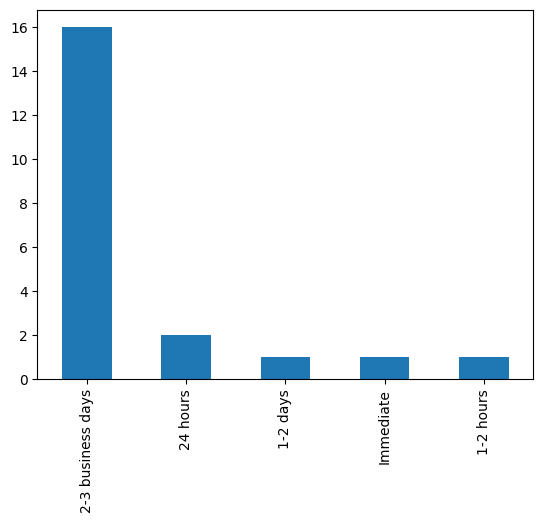

In [27]:
pd.value_counts(final_data['ETA']).plot.bar()
plt.show()

### **Q6: Share your observations and insights from this exercise, and your recommendations for a business looking to adopt a solution such as this.**

- This model appears to be extremely responsive and provides usefull insights.
- As a chatbot tool and help assistant the company should definitely consider ading this, as it would cut down on costs for support tickets.
- The model is very good at understandingthe different categories, the additional tags it can add, and the ETA (giving multiple responses).
- However, the model is not very good at discerning the level of priority for the customers. Since all customer complaints will make their issue sound urgent the model will have to be trained on more data with concrete priority results in order to improve.
- The data still has to be trained on significnatly more querries and answers specific to the service. This would make a much more targeted chatbot and cusotmer ticket reviews could help differentiate between good and bad solutions to requests.




---



In [29]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/UT AI Course/Module 7 - Natural Language Processing/Project/NLP_Project__Learner_Notebook.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/UT AI Course/Module 7 - Natural Language Processing/Project/NLP_Project__Learner_Notebook.ipynb to html
[NbConvertApp] Writing 846931 bytes to /content/drive/MyDrive/UT AI Course/Module 7 - Natural Language Processing/Project/NLP_Project__Learner_Notebook.html
